# Mini Project 3 - II. Dimensional Reduction
Apply dimensionality reduction using PCA and select only the two most important components from the word embedding, and plot each word representation on a 2D graph.

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pathlib

def load_and_plot_data(file_word_embbedings, file_word_to_index, graph_name='2D PCA of Word Embeddings'):
    word_to_embeddings = np.load(file_word_embbedings, allow_pickle=True).item()
    
    word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
    index_to_word = {v: k for k, v in word_to_index.items()}

    # Create an array of array 50-dimensional with zeros
    embeddings_array = np.zeros((len(word_to_embeddings), 50))

    for word, embedding in word_to_embeddings.items():
        index = word_to_index[word]
        embeddings_array[index] = embedding

    # Fit PCA on the embeddings
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings_array)

    reduced_word_embeddings = {}
    plt.figure(figsize=(20, 10))
    for i, embedding in enumerate(reduced_embeddings):
        word = index_to_word[i]
        reduced_word_embeddings[word] = embedding
        x, y = embedding
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(graph_name)
    plt.show()
    
    return reduced_word_embeddings

### Load Word Embeddings

In [3]:
file_word_embbedings = "word_to_embedding4.npy" # Change as you prefer

In [4]:
word_to_embeddings = np.load(file_word_embbedings, allow_pickle=True).item()
word_to_embeddings

{'ម៉ែត្រ': array([-0.15629084, -0.8970666 ,  0.4800078 ,  0.08314565,  0.22218458,
         0.3808433 ,  0.75632036,  0.27772215, -1.1926374 ,  0.09634368,
         0.3321798 , -0.1670536 ,  0.4282477 ,  0.01800672,  0.19031854,
         0.2645517 ,  0.11199795, -0.15306789, -0.06078188,  0.03340449,
        -0.36180997,  0.00928806,  0.3675855 , -0.20665288,  0.12785387,
         0.78322923,  0.04688639,  0.2464455 ,  0.3182812 ,  0.29023963,
        -0.5259692 ,  0.13871273,  0.17846605, -0.18147491,  0.87896454,
        -0.00691455, -1.1659542 ,  0.12654985,  0.13947435, -0.13368607,
         0.04631158,  0.1113827 ,  0.62899333,  0.4883759 ,  0.00312707,
        -0.20332108,  0.02057537, -0.54553217,  0.5355184 , -0.42573494],
       dtype=float32),
 'មួយ': array([-0.7243208 , -0.65916896,  0.07415514, -0.10682237,  1.7370589 ,
        -0.53759   ,  0.17332369, -0.07557572, -0.41624826, -0.88639754,
        -0.20751965, -0.45044145,  0.5410938 ,  0.15362747, -0.69487953,
        -1

In [5]:
word_to_index = np.load("word_to_index.npy", allow_pickle=True).item()

In [6]:
index_to_word = {v: k for k, v in word_to_index.items()}
vocabs = word_to_index.keys()

len(vocabs), word_to_index, index_to_word

(175,
 {'ម៉ែត្រ': 0,
  'មួយ': 1,
  'ជាប់': 2,
  'កម្ពុជា': 3,
  'ឈ្មោះ': 4,
  'ទិស': 5,
  'សាសនា': 6,
  'ដំបូង': 7,
  'ទេសចរណ៍': 8,
  'ស្ថិត': 9,
  'វិញ': 10,
  'រួម': 11,
  'សម័យ': 12,
  'ប្រាង្គ': 13,
  'នឹង': 14,
  'បុរាណ': 15,
  'អំពី': 16,
  'ទី': 17,
  'ប្រវែង': 18,
  'ចម្លាក់': 19,
  'ប៉ម': 20,
  'ផ្នែក': 21,
  'ខាង': 22,
  'អាច': 23,
  'សំណង់': 24,
  'ដូចជា': 25,
  'ឡើយ': 26,
  'ពិភពលោក': 27,
  'មក': 28,
  'សំខាន់': 29,
  'កំពុង': 30,
  'រាង': 31,
  'អោយ': 32,
  'អង្គរវត្ត': 33,
  'ធ្វើ': 34,
  'ស្ថាបត្យកម្ម': 35,
  'ថា': 36,
  'ក្នុង': 37,
  'ថ្ម': 38,
  'ខ្មែរ': 39,
  'អង្គរ': 40,
  'នៃ': 41,
  'ភ្នំ': 42,
  'ពួក': 43,
  'ផងដែរ': 44,
  'ប្រាសាទ': 45,
  'តាម': 46,
  'ស្រាល': 47,
  'មិន': 48,
  'ហៅ': 49,
  'ខ្លួន': 50,
  'ច្រើន': 51,
  'ពីរ': 52,
  'ទាំងអស់': 53,
  'ព័ទ្ធ': 54,
  'ឡើង': 55,
  'នៅ': 56,
  'គឺ': 57,
  'ទៀត': 58,
  'យ៉ាង': 59,
  'តំបន់': 60,
  'អ្នក': 61,
  'របស់': 62,
  'ដល់': 63,
  'ដើម': 64,
  'ចេញ': 65,
  'ជាង': 66,
  'ខេត្ត': 67,
  'គ្នា': 68,
  'នគរ': 69,
  

In [7]:
# Create an array of array 50-dimensional with zeros
embeddings_array = np.zeros((len(word_to_embeddings), 50))

for word, embedding in word_to_embeddings.items():
    index = word_to_index[word]
    embeddings_array[index] = embedding

embeddings_array

array([[-0.15629084, -0.89706659,  0.4800078 , ..., -0.54553217,
         0.53551841, -0.42573494],
       [-0.72432083, -0.65916896,  0.07415514, ..., -0.09845594,
        -0.31677756,  0.52318865],
       [ 0.26898679,  0.38010615,  0.25538456, ..., -0.0221277 ,
         0.24451256, -0.00276685],
       ...,
       [-0.8536216 , -0.83333868, -0.3278065 , ..., -0.03215203,
         0.13493305,  0.63166231],
       [ 0.20597246,  0.43285722,  0.17723486, ...,  0.19524492,
         0.04884125,  0.20175783],
       [ 0.05033246, -0.06928261, -0.20199299, ..., -0.09024346,
        -0.11988508,  0.10561695]])

### Apply PCA

In [8]:
# Fit PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

#### Plot the graph

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

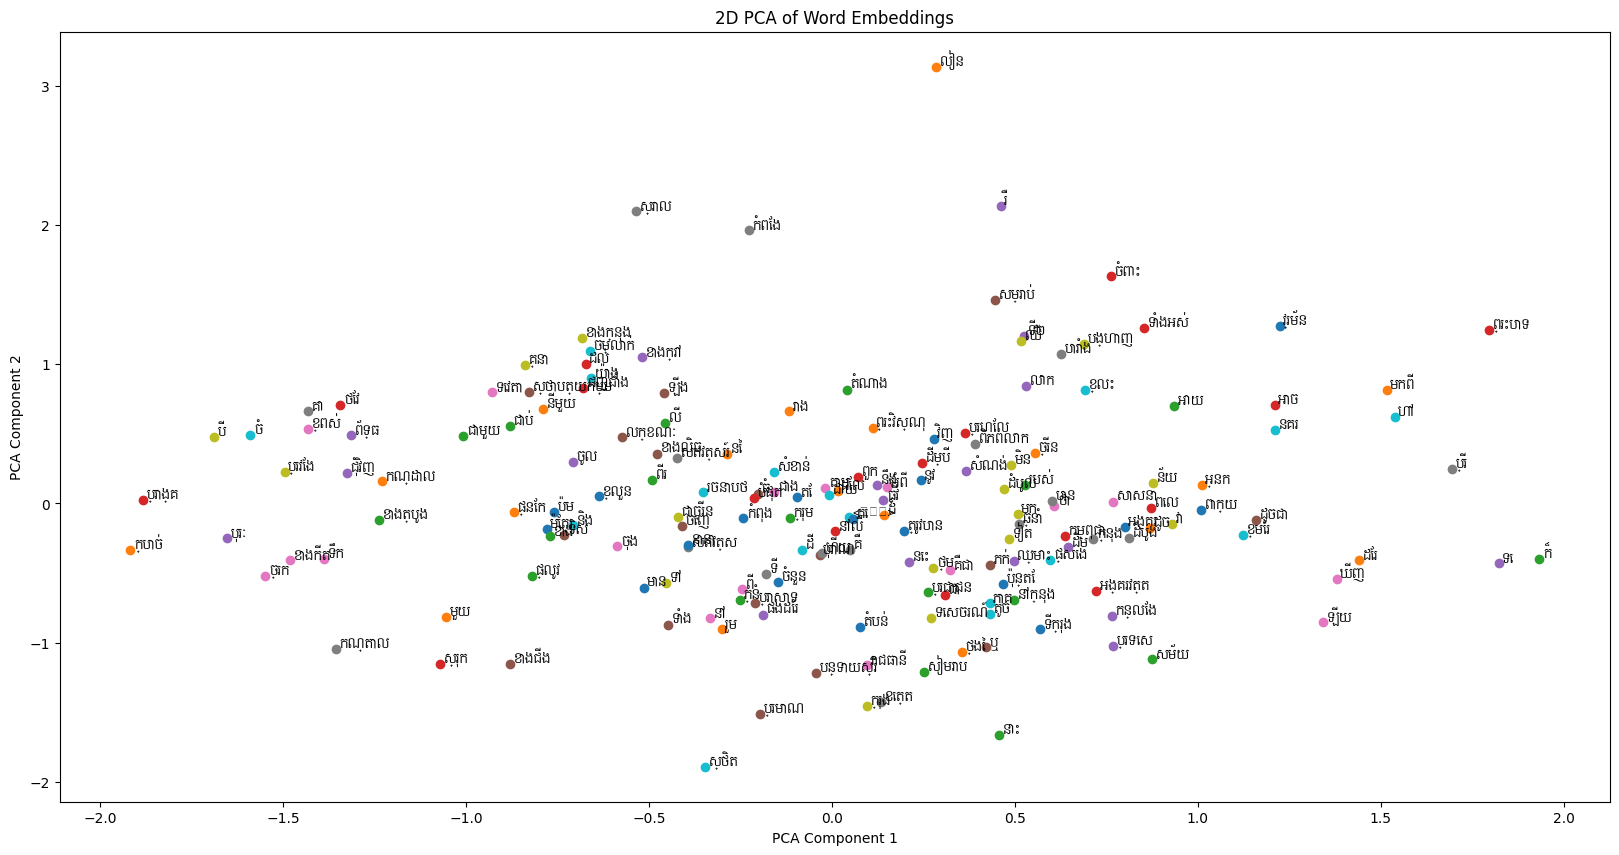

In [9]:
import pathlib

plt.figure(figsize=(20, 10))
for i, embedding in enumerate(reduced_embeddings):
    word = index_to_word[i]
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Embeddings')
plt.show()

## Plot All Results

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

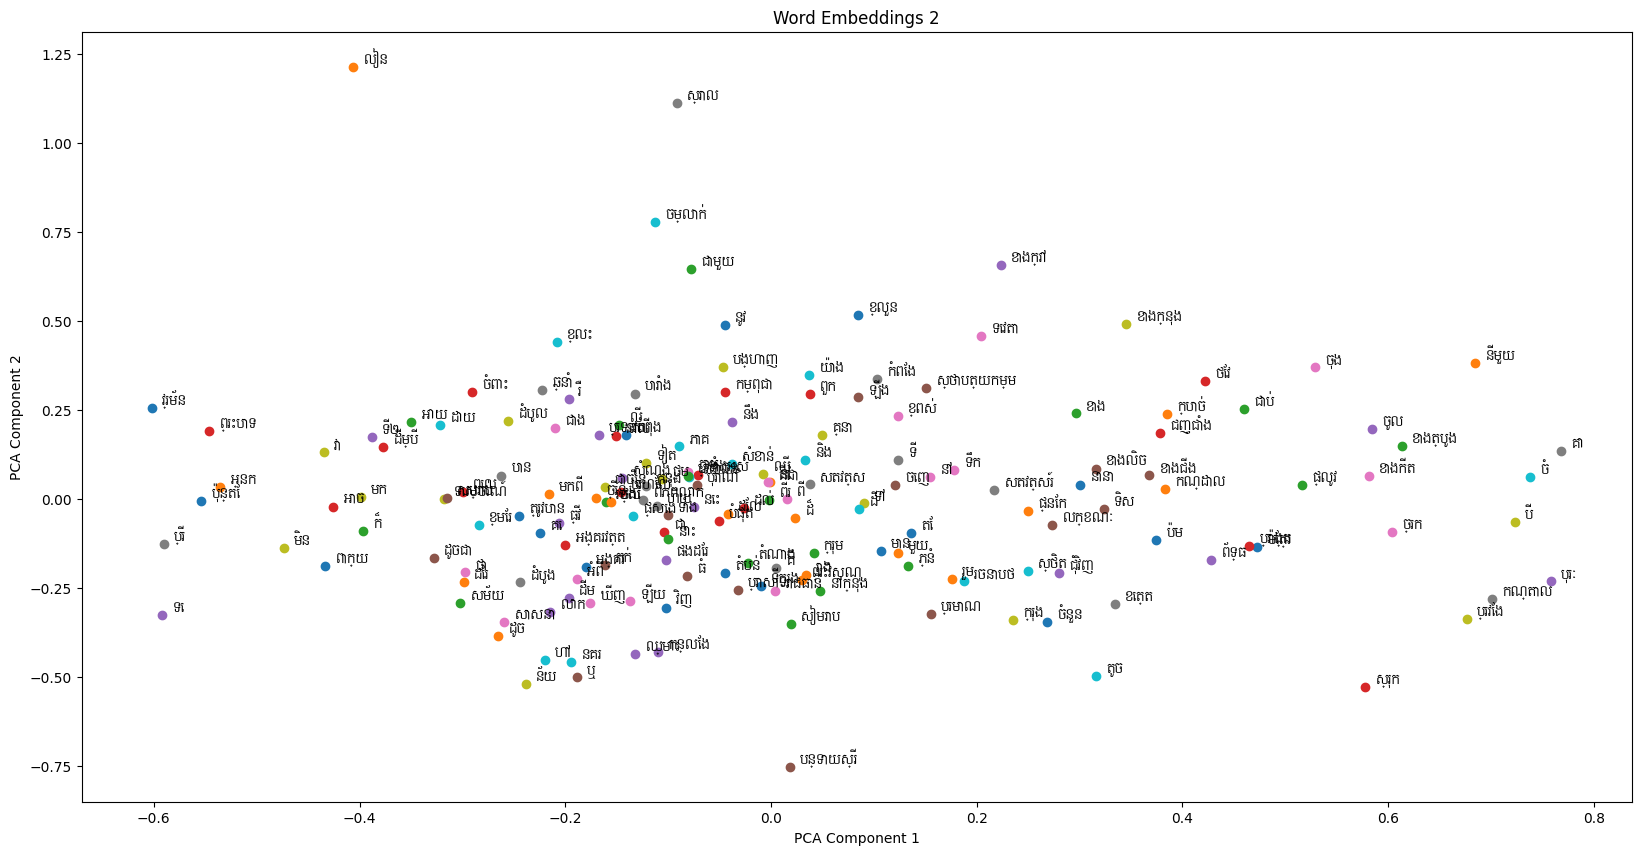

In [12]:
graph2 = load_and_plot_data("word_to_embedding2.npy", "word_to_index.npy", "Word Embeddings 2")

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

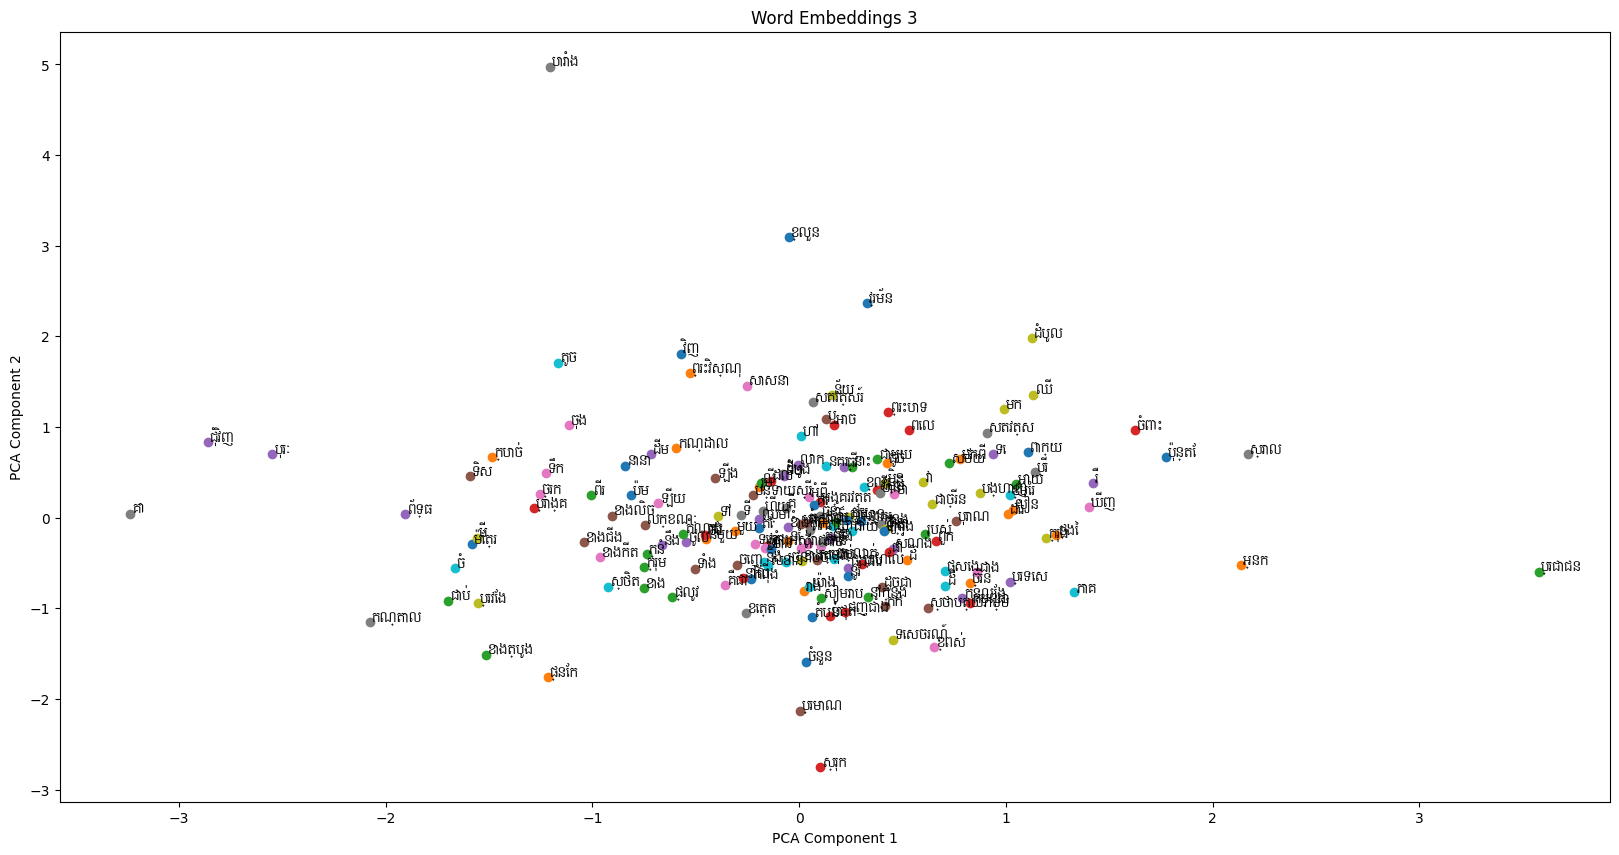

In [13]:
graph3 = load_and_plot_data("word_to_embedding3.npy", "word_to_index.npy", "Word Embeddings 3")

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

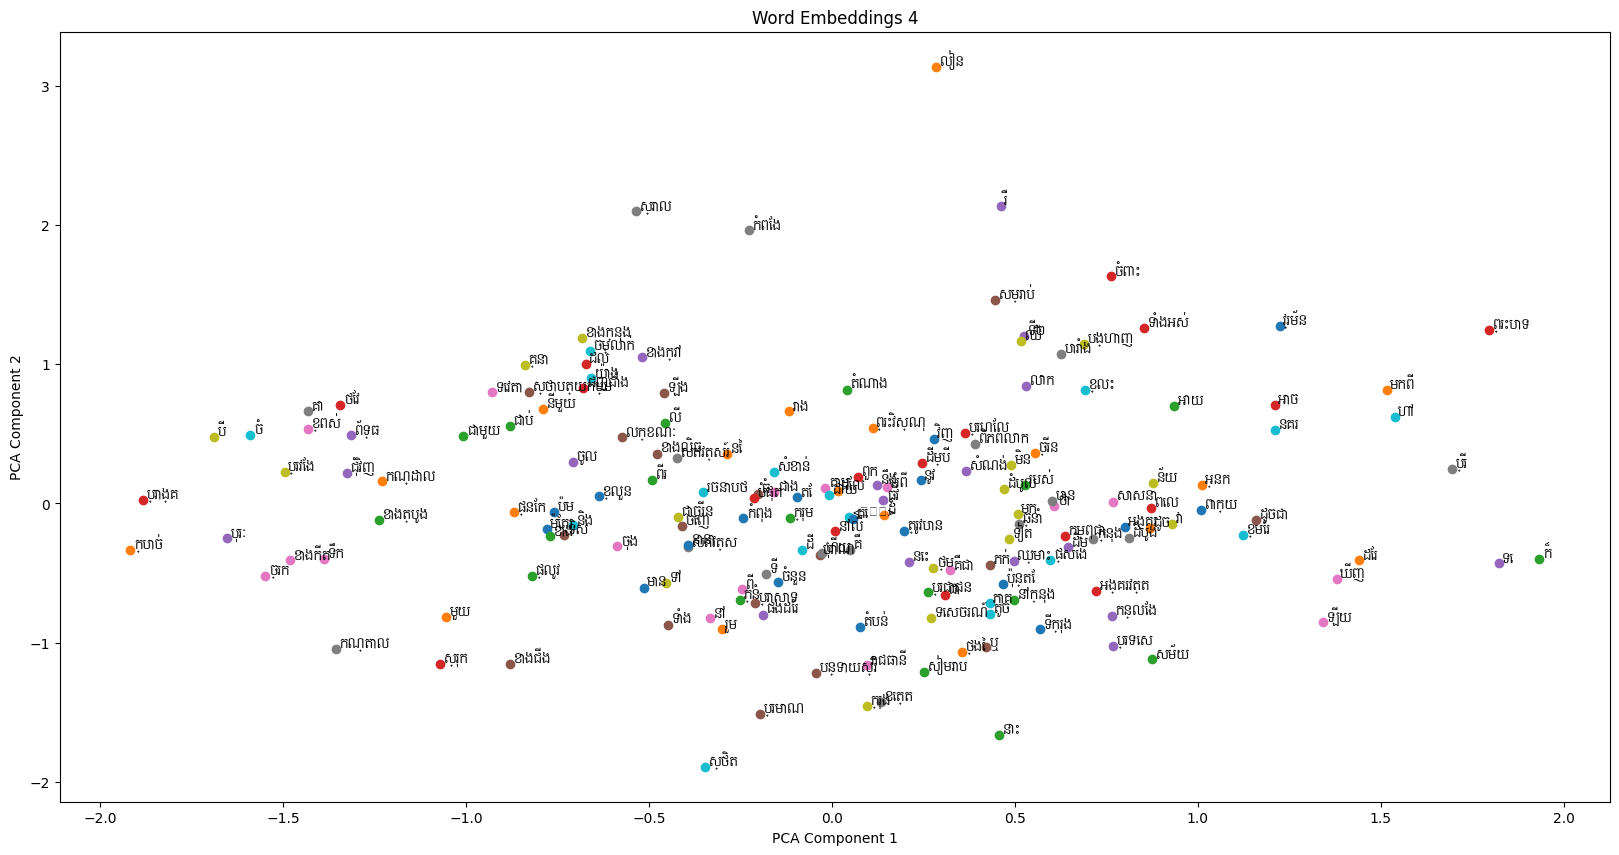

In [14]:
graph4 = load_and_plot_data("word_to_embedding4.npy", "word_to_index.npy", "Word Embeddings 4")

## Discussion
From the graph visualizations above, we can argue that the embedding graph number 2 is better than other since there many similar pair words such as `ខាងត្បូង`-`ខាងកើត`, `ខាងលិច`-`ខាងលិច`,`ស្ថិត`-`ជុំវិញ`,...